<a href="https://colab.research.google.com/github/clionelove123/temp_test/blob/main/Chap_5_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
# 텐서플로우를 이용한 ANN(Artificial Neural Networks) 구현

import tensorflow as tf

In [2]:
# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.
# 레이블 데이터에 one-hot encoding을 적용합니다.
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

In [3]:
# 학습을 위한 설정값들을 정의합니다.
learning_rate = 0.001
num_epochs = 30     # 학습횟수
batch_size = 256    # 배치개수
display_step = 1    # 손실함수 출력 주기
input_size = 784    # 28 * 28
hidden1_size = 256
hidden2_size = 256
output_size = 10

In [4]:
# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

# ANN 모델을 정의합니다.
class ANN(object):
  # ANN 모델을 위한 tf.Variable들을 정의합니다.
  def __init__(self):
    self.W1 = tf.Variable(tf.random.normal(shape=[input_size, hidden1_size]))
    self.b1 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W2 = tf.Variable(tf.random.normal(shape=[hidden1_size, hidden2_size]))
    self.b2 = tf.Variable(tf.random.normal(shape=[hidden2_size]))
    self.W_output = tf.Variable(tf.random.normal(shape=[hidden2_size, output_size]))
    self.b_output = tf.Variable(tf.random.normal(shape=[output_size]))

  def __call__(self, x):
    H1_output = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
    H2_output = tf.nn.relu(tf.matmul(H1_output, self.W2) + self.b2)
    logits = tf.matmul(H2_output, self.W_output) + self.b_output

    return logits

In [5]:
# cross-entropy 손실 함수를 정의합니다.
@tf.function
def cross_entropy_loss(logits, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# 최적화를 위한 Adam 옵티마이저를 정의합니다.
optimizer = tf.optimizers.Adam(learning_rate)

# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))

# 모델의 정확도를 출력하는 함수를 정의합니다.
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

In [6]:
# ANN 모델을 선언합니다.
ANN_model = ANN()

# 지정된 횟수만큼 최적화를 수행합니다.
for epoch in range(num_epochs):
  average_loss = 0.
  total_batch = int(x_train.shape[0] / batch_size)
  # 모든 배치들에 대해서 최적화를 수행합니다.
  for batch_x, batch_y in train_data:
    # 옵티마이저를 실행해서 파라마터들을 업데이트합니다.
    _, current_loss = train_step(ANN_model, batch_x, batch_y), cross_entropy_loss(ANN_model(batch_x), batch_y)
    # 평균 손실을 측정합니다.
    average_loss += current_loss / total_batch
  # 지정된 epoch마다 학습결과를 출력합니다.
  if epoch % display_step == 0:
    print("반복(Epoch): %d" % (epoch+1), "정확도 (Accuracy): %f" % compute_accuracy(ANN_model(batch_x), batch_y), "손실 함수(Loss): %f" % average_loss)
    print("Test데이터 - 정확도(Accuracy): %f" % compute_accuracy(ANN_model(x_test), y_test)," / 손실(loss): %f" % cross_entropy_loss(ANN_model(x_test), y_test)) # 정확도: 약 94%


반복(Epoch): 1 정확도 (Accuracy): 0.666667 손실 함수(Loss): 298.607330
Test데이터 - 정확도(Accuracy): 0.809500  / 손실(loss): 83.578476
반복(Epoch): 2 정확도 (Accuracy): 0.770833 손실 함수(Loss): 65.687859
Test데이터 - 정확도(Accuracy): 0.867400  / 손실(loss): 52.738602
반복(Epoch): 3 정확도 (Accuracy): 0.854167 손실 함수(Loss): 42.632942
Test데이터 - 정확도(Accuracy): 0.885000  / 손실(loss): 40.055050
반복(Epoch): 4 정확도 (Accuracy): 0.895833 손실 함수(Loss): 31.262327
Test데이터 - 정확도(Accuracy): 0.898600  / 손실(loss): 33.419273
반복(Epoch): 5 정확도 (Accuracy): 0.937500 손실 함수(Loss): 24.155664
Test데이터 - 정확도(Accuracy): 0.909400  / 손실(loss): 29.445774
반복(Epoch): 6 정확도 (Accuracy): 0.947917 손실 함수(Loss): 19.077015
Test데이터 - 정확도(Accuracy): 0.915000  / 손실(loss): 26.521759
반복(Epoch): 7 정확도 (Accuracy): 0.958333 손실 함수(Loss): 15.402907
Test데이터 - 정확도(Accuracy): 0.915900  / 손실(loss): 24.998968
반복(Epoch): 8 정확도 (Accuracy): 0.979167 손실 함수(Loss): 12.597930
Test데이터 - 정확도(Accuracy): 0.920100  / 손실(loss): 22.444332
반복(Epoch): 9 정확도 (Accuracy): 0.947917 손실 함수(Loss): 10.3

In [7]:
# 테스트 데이터를 이용해서 학습된 모델이 얼마나 정확한지 정확도를 출력합니다.
print("정확도(Accuracy): %f" % compute_accuracy(ANN_model(x_test), y_test)) # 정확도: 약 94%

정확도(Accuracy): 0.941400


Saving temp3.png to temp3 (1).png


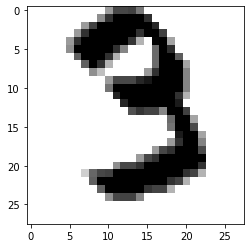

In [8]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
uploaded = files.upload()
 
#bmpSample = mpimg.imread('temp1.bmp')
#bmpSample_2 = mpimg.imread('temp2.bmp')
bmpSample_3 = mpimg.imread('temp3.png')

#plt.figure(figsize=(15, 10))
#plt.subplot(1,3,1)
#plt.title('bmp')


#plt.imshow(bmpSample)
plt.imshow(bmpSample_3)


In [18]:
#bmpSample_t=bmpSample.astype('float32')
#bmpSample_t_2=bmpSample_2.astype('float32')
bmpSample_t_3=bmpSample_3.astype('float32')

#bmpSample_t = bmpSample_t.reshape([-1, 784])
#bmpSample_t_2 = bmpSample_t_2.reshape([-1, 784])
bmpSample_t_3 = bmpSample_t_3.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
##bmpSample_t = bmpSample_t / 255.
#bmpSample_t_2 = bmpSample_t_2 / 255.
bmpSample_t_3 = bmpSample_t_3 / 255.

y_test_pre=ANN_model(bmpSample_t_3)

print(y_test_pre.numpy())

[[ -59.311012     9.239596  -120.475975    39.777126  -130.83871
    -3.3532064 -146.27202    -22.756508   -26.50383    -79.59014  ]
 [ -68.157845     4.1208563 -128.00903     38.447712  -140.50423
     7.024633  -148.65897    -29.419985   -32.09365    -79.284485 ]
 [ -65.97765      9.113134  -122.807724    49.961456  -139.87239
     4.17878   -147.52328    -36.957077   -29.948841   -72.46088  ]]


In [20]:
y_test=tf.nn.softmax(ANN_model(bmpSample_t_3))
print(y_test.numpy())

[[0.0000000e+00 5.4666300e-14 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.8566687e-19 0.0000000e+00 6.9500471e-28 1.6388710e-29 0.0000000e+00]
 [0.0000000e+00 1.2360510e-15 0.0000000e+00 1.0000000e+00 0.0000000e+00
  2.2549161e-14 0.0000000e+00 3.3529951e-30 2.3135224e-31 0.0000000e+00]
 [0.0000000e+00 1.8188630e-18 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.3086881e-20 0.0000000e+00 1.7855031e-38 1.9742423e-35 0.0000000e+00]]


In [21]:
tf.argmax(y_test)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])>